# lines

Example scatterplots with Formula 1 data from
https://ergast.com/mrd/db

In [1]:
%load_ext autoreload
%autoreload 2
%autosave 0

from etl import DATADIR, ErgastF1
from viz import Plot

f1 = ErgastF1(DATADIR / 'ergast/f1.zip')
plot = Plot()

Autosave disabled


## 

In [2]:
def id_race(year, name):
    races = (
        f1.races
        .loc[lambda df: df['season'].eq(year)]
        .loc[lambda df: df['race'].eq(name)]
    )
    return races.index.values[0]
            
def lapgaps(year, name):
    race = id_race(year, name)
    data = (
        # When did each driver finish Nth lap? (Can be null.)
        f1.lap_times
        .loc[lambda df: df['id_race'].eq(race)]
        .join(f1.drivers['driver'], on='id_driver')
        .pivot(index='lap', columns='driver', values='seconds')
        .cumsum()
    )
    # Find gap to leader on each lap.
    data = data.sub(data.min(axis=1), axis=0)
    # Sort drivers by gap on last lap.
    data = data[data.iloc[-1].sort_values().index]    
    
    return data
    
lapgaps(2004, 'Belgian Grand Prix').tail()

driver,Kimi Räikkönen,Michael Schumacher,Rubens Barrichello,Felipe Massa,Giancarlo Fisichella,Christian Klien,David Coulthard,Olivier Panis,Jarno Trulli,Antônio Pizzonia,Fernando Alonso,Jenson Button,Juan Pablo Montoya,Nick Heidfeld,Ricardo Zonta,Zsolt Baumgartner
lap,,,,,,,,,,,,,,,,
40,0.0,1.526,5.614,7.352,8.338,9.477,18.849,10.405,11.581,NaN,NaN,NaN,NaN,533.573,6.470,NaN
41,0.0,0.772,2.841,3.997,5.638,5.896,7.200,6.561,6.896,NaN,NaN,NaN,NaN,NaN,3.405,NaN
42,0.0,2.345,5.091,8.458,10.328,10.670,12.775,12.530,14.274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,0.0,3.397,5.406,10.826,12.886,13.391,16.311,16.775,19.570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,0.0,3.132,4.371,12.504,14.104,14.614,17.970,18.693,22.115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## leave Kimi alone

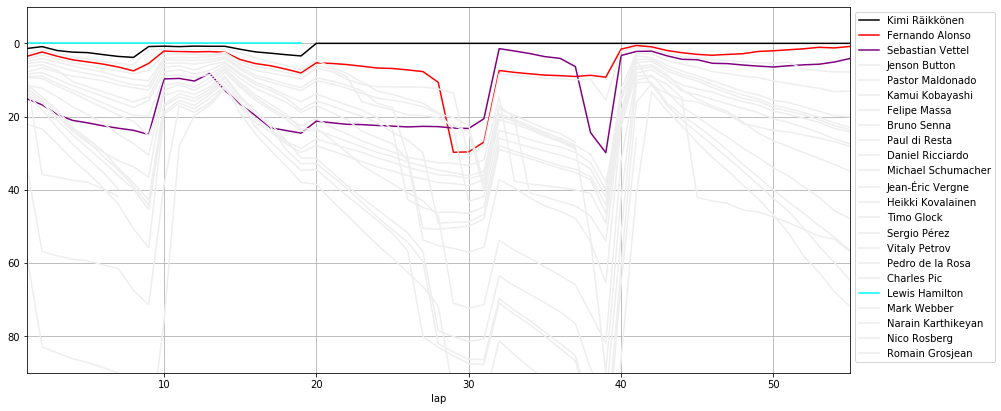

In [26]:
gaps = lapgaps(2012, 'Abu Dhabi Grand Prix')

color = dict()
color['Kimi Räikkönen'] = 'black'
color['Fernando Alonso'] = 'red'
color['Sebastian Vettel'] = 'purple'
color['Lewis Hamilton'] = 'cyan'
color = gaps.columns.map(color).fillna('#eeeeee')
axes = plot.line(gaps, ylim=(90,-10), color=color)

## max pressure

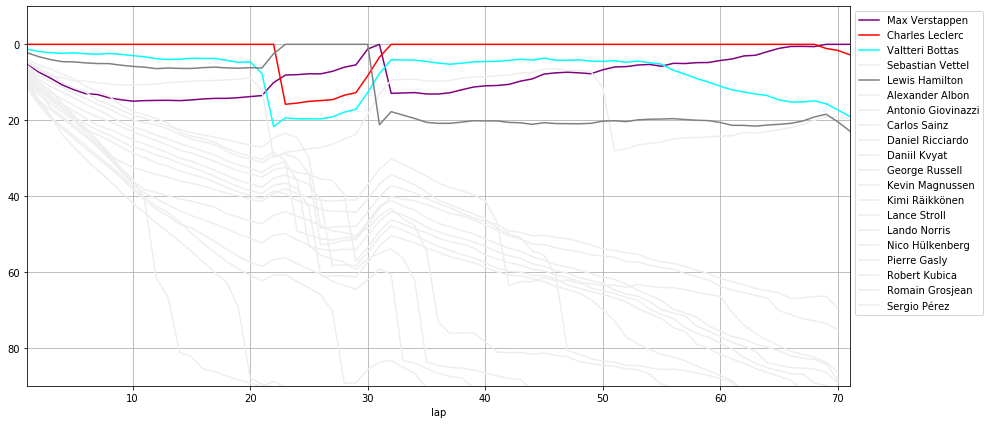

In [25]:
gaps = lapgaps(2019, 'Austrian Grand Prix')

color = dict()
color['Max Verstappen'] = 'purple'
color['Charles Leclerc'] = 'red'
color['Valtteri Bottas'] = 'cyan'
color['Lewis Hamilton'] = 'grey'
color = gaps.columns.map(color).fillna('#eeeeee')
axes = plot.line(gaps, ylim=(90, -10), color=color)

## hammer time

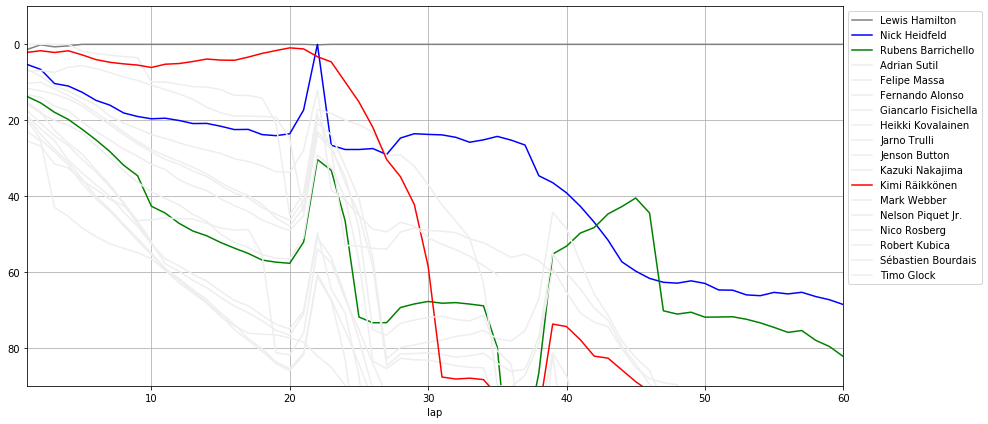

In [28]:
gaps = lapgaps(2008, 'British Grand Prix')

color = dict()
color['Lewis Hamilton'] = 'grey'
color['Nick Heidfeld'] = 'blue'
color['Rubens Barrichello'] = 'green'
color['Kimi Räikkönen'] = 'red'
color = gaps.columns.map(color).fillna('#eeeeee')
axes = plot.line(gaps, ylim=(90, -10), color=color)